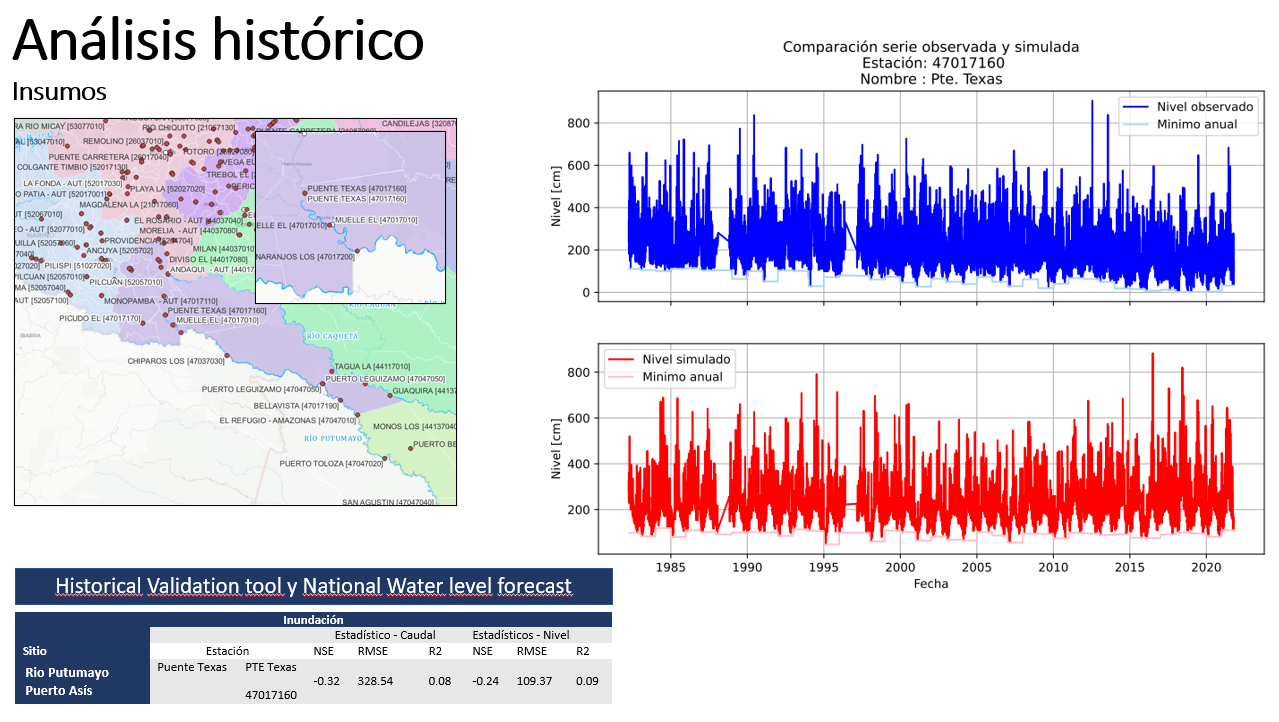

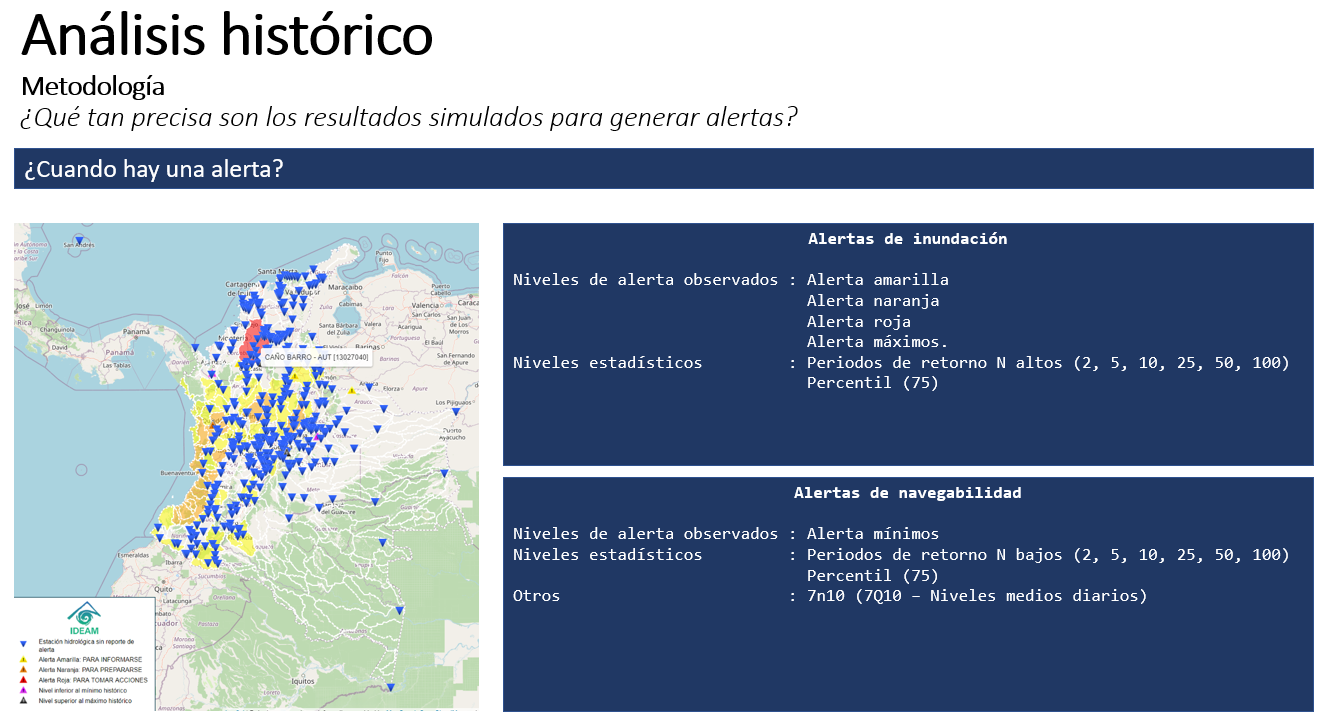

In [50]:
from owslib.wfs import WebFeatureService
from owslib.wms import WebMapService

wms = WebMapService("https://geoserver.hydroshare.org/geoserver/HS-dd069299816c4f1b82cd1fb2d59ec0ab/wms")
print('')
print("Title: ", wms.identification.title)
print('')
print("Type: ", wms.identification.type)
print('')
print("Operations: ", [op.name for op in wms.operations])
print('')
print("GetMap options: ", wms.getOperationByName("GetMap").formatOptions)
print('')
wms.contents.keys()


Title:  GeoServer Web Map Service

Type:  OGC:WMS

Operations:  ['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'DescribeLayer', 'GetLegendGraphic', 'GetStyles']

GetMap options:  ['image/png', 'application/atom xml', 'application/atom+xml', 'application/json;type=utfgrid', 'application/openlayers', 'application/openlayers2', 'application/openlayers3', 'application/pdf', 'application/rss xml', 'application/rss+xml', 'application/vnd.google-earth.kml', 'application/vnd.google-earth.kml xml', 'application/vnd.google-earth.kml+xml', 'application/vnd.google-earth.kml+xml;mode=networklink', 'application/vnd.google-earth.kmz', 'application/vnd.google-earth.kmz xml', 'application/vnd.google-earth.kmz+xml', 'application/vnd.google-earth.kmz;mode=networklink', 'atom', 'image/geotiff', 'image/geotiff8', 'image/gif', 'image/gif;subtype=animated', 'image/jpeg', 'image/png8', 'image/png; mode=8bit', 'image/svg', 'image/svg xml', 'image/svg+xml', 'image/tiff', 'image/tiff8', 'image/vnd.jpeg-png', '

odict_keys(['spearfish', 'tasmania', 'tiger-ny', 'FEWS_Stations_N', 'FEWS_Stations_Q', 'IDEAM_Stations_v2', 'Selected_Stations_Colombia_WL', 'south_america-colombia-geoglows-drainage_line'])

In [51]:
for key in ['spearfish', 'tasmania', 'tiger-ny', 'FEWS_Stations_N', 'FEWS_Stations_Q', 'IDEAM_Stations_v2', 'Selected_Stations_Colombia_WL', 'south_america-colombia-geoglows-drainage_line']:
    print(wms.contents[key].title)

Spearfish
Tasmania
TIGER New York
FEWS_Stations_N
FEWS_Stations_Q
IDEAM_Stations_v2
Selected_Stations_Colombia_WL
south_america-colombia-geoglows-drainage_line


In [52]:
# NBVAL_IGNORE_OUTPUT

from IPython.core.display import HTML

name = "FEWS_Stations_Q"
layer = wms.contents[name]
print("Abstract: ", layer.abstract)
print('')
print("BBox: ", layer.boundingBoxWGS84)
print('')
print("CRS: ", layer.crsOptions)
print('')
print("Styles: ", layer.styles)
print('')
print("Timestamps: ", layer.timepositions)
print('')
HTML(layer.parent.abstract)

Abstract:  None

BBox:  (-78.66874999035203, -1.4446110000000005, -67.9354166670062, 11.477916666469524)

CRS:  ['EPSG:2465', 'EPSG:32732', 'EPSG:4753', 'EPSG:6996', 'EPSG:5127', 'EPSG:3469', 'EPSG:6679', 'EPSG:6508', 'EPSG:6113', 'EPSG:4634', 'EPSG:4989', 'EPSG:6322', 'EPSG:5183', 'EPSG:2537', 'EPSG:5864', 'EPSG:21474', 'EPSG:6735', 'EPSG:23866', 'EPSG:32610', 'EPSG:4082', 'EPSG:2115', 'EPSG:29180', 'EPSG:5925', 'EPSG:4908', 'EPSG:4974', 'EPSG:28488', 'EPSG:32540', 'EPSG:26772', 'EPSG:6442', 'EPSG:6561', 'EPSG:5121', 'EPSG:5048', 'EPSG:27700', 'EPSG:6358', 'EPSG:32510', 'EPSG:5951', 'EPSG:3256', 'EPSG:3734', 'EPSG:5627', 'EPSG:6147', 'EPSG:5383', 'EPSG:4375', 'EPSG:4521', 'EPSG:5953', 'EPSG:5296', 'EPSG:29172', 'EPSG:28485', 'EPSG:2402', 'EPSG:6676', 'EPSG:6598', 'EPSG:6207', 'EPSG:2010', 'EPSG:28427', 'EPSG:32425', 'EPSG:2163', 'EPSG:5363', 'EPSG:5828', 'EPSG:6577', 'EPSG:2641', 'EPSG:3218', 'EPSG:4169', 'EPSG:4074', 'EPSG:32717', 'EPSG:29375', 'EPSG:4295', 'EPSG:61606405', 'EPSG:265

In [125]:
name = "FEWS_Stations_Q"

response = wms.getmap(
    layers=[
        name,
    ],
    bbox=(-180, -90, 180, 90),  # Left, bottom, right, top
    # bbox = (-78.66874999035203, -1.4446110000000005, -67.9354166670062, 11.477916666469524),
    format="image/png",
    size=(600, 600),
    srs="EPSG:4326",
    transparent=True,
)
response

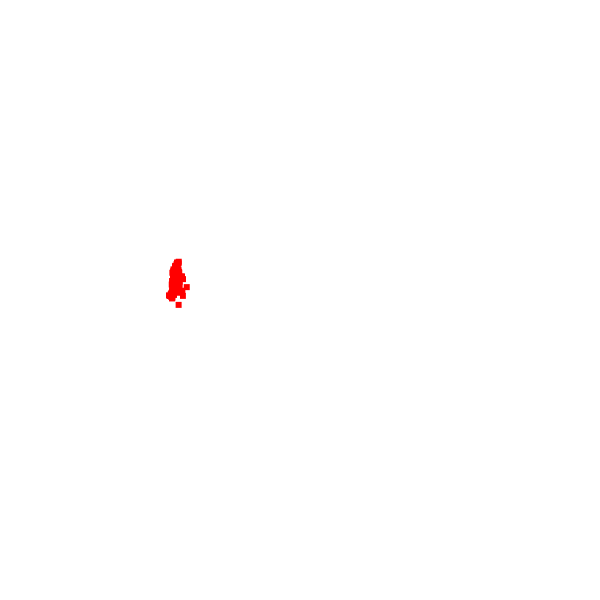

In [127]:
from IPython.display import Image

Image(response.read())

In [95]:
import io
import warnings

import cartopy
import matplotlib.pyplot as plt

image = io.BytesIO(response.read())
data = plt.imread(image)

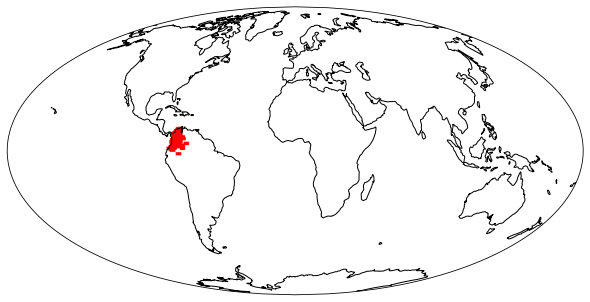

In [99]:
warnings.filterwarnings("ignore", category=cartopy.io.DownloadWarning)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1], projection=cartopy.crs.Mollweide())
ax.imshow(
    data,
    origin="upper",
    extent=(-180, 180, -90, 90),
    transform=cartopy.crs.PlateCarree(),
)
ax.coastlines()
plt.show()

In [65]:
help(cartopy.crs)

Help on module cartopy.crs in cartopy:

NAME
    cartopy.crs

DESCRIPTION
    The crs module defines Coordinate Reference Systems and the transformations
    between them.

CLASSES
    builtins.object
        Globe
    _CylindricalProjection(_RectangularProjection)
        PlateCarree
        RotatedPole
    _Eckert(_WarpedRectangularProjection)
        EckertI
        EckertII
        EckertIII
        EckertIV
        EckertV
        EckertVI
    _RectangularProjection(Projection)
        LambertCylindrical
        Miller
    _Satellite(Projection)
        Geostationary
        NearsidePerspective
    _WarpedRectangularProjection(Projection)
        EqualEarth
        Mollweide
        Robinson
    pyproj.crs.crs.CustomConstructorCRS(pyproj.crs.crs.CRS)
        CRS
            Geocentric
            Geodetic
            Projection
                AlbersEqualArea
                AzimuthalEquidistant
                EquidistantConic
                Gnomonic
                InterruptedG

In [73]:
help(cartopy.crs.epsg())

Help on function epsg in module cartopy.crs:

epsg(code)
    Return the projection which corresponds to the given EPSG code.
    
    The EPSG code must correspond to a "projected coordinate system",
    so EPSG codes such as 4326 (WGS-84) which define a "geodetic coordinate
    system" will not work.
    
    Note
    ----
        The conversion is performed by pyproj.CRS.



In [ ]:
cartopy.crs.Mollweide()